# Exploring linear/nonlinear regression.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

## Generating Data

In [3]:
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)
x_train = np.c_[np.ones((x.shape[0], 1)), x]


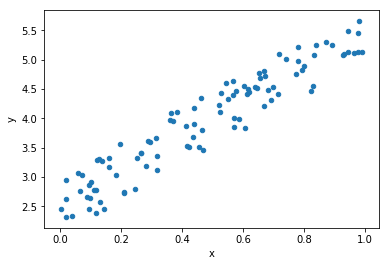

In [69]:
plt.scatter(x,y,s=20)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Finding a closed form solution for fitting the best line

In general a linear model is expressed as $ \hat{y}^{(i)}$=$$\sum_{j=1}^{d}x_{j}^{(i)} \ \theta_{j}$$ $ for $d$ dimensional data, 
where we assume $ x_{1}^{(i)}=1 $ (bias term) <br> and the loss is defined as $j\ (\theta)=(\hat{y}^{(i)}-y_{i})^2 $<br>
$subscript\ notation\ used\ to\ reference\ a\ specific\ training\ instance$

We can express the linear model in matrix form as
\begin{equation}
 \hat{Y} = X\theta \  where \  \hat{Y} \in \mathbb{R} ^{n\times1} ,   X \in \mathbb{R} ^{n\times d}  ,   \theta \in \mathbb{R} ^{d\times 1} 
\end{equation}

also the loss function represented in matrix form
\begin{equation}
j\ (\theta)=\sum_{i=1}^{n} (y^{(i)}-{\textbf{x}^{(i)}}^T \boldsymbol{ \theta})^2 = (\textbf{Y}-\textbf{X} \boldsymbol{\theta)}^T (\textbf{Y}-\textbf{X} \boldsymbol{\theta)} 
\end{equation}

we need to minimize $j(\theta)$ so we take the derivative wrt. $\theta$ and set it to $0$ then solve for $\theta$
\begin{equation} 
j\ (\theta)=(\textbf{Y}-\textbf{X} \boldsymbol{\theta)}^T (\textbf{Y}-\textbf{X} \boldsymbol{\theta)}
\end{equation}

\begin{equation} 
\frac{\partial j(\theta)}{\partial \theta} = \frac{\partial}{\partial \theta}(Y^TY - 2Y^TX^T\theta + \theta^TX^TX\theta)
\end{equation}

\begin{equation} 
=2X^TY+X^TX\theta=0
\end{equation}

\begin{equation} 
\theta=(X^TX)^{-1}X^TY
\end{equation}


In [70]:
theta=np.linalg.inv(x_train.transpose().dot(x_train)).dot(x_train.transpose().dot(y))
print (theta)

[[2.55808002]
 [2.93655106]]


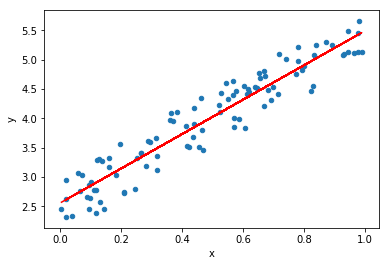

In [24]:
# Create a list of values in the best fit line
abline_values = [theta[1] * i + theta[0] for i in x]

# Plot the best fit line over the actual values
plt.scatter(x,y,s=20)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, abline_values, 'r')
plt.show()

# Using Gradient Descent

We estimate the parameters $\theta_{1:d}$ by taking the derivative of the cost function wrt $\theta$ and use the derivative to update the parameters.<br>
loss function defined as 
\begin{equation}
j\ (\theta)=\frac{1}{2n} \sum_{i=1}^{n} (\hat{y}^{(i)} - y^{(i)})^2
\end{equation}

\begin{equation}
\frac{\partial}{\partial \theta} j(\theta) = \frac{\partial}{\partial \theta} \frac{1}{2n} \sum_{i=1}^{n}\left(\sum_{j=1}^{d}x_{j}^{(i)} \ \theta_{j}-y^{(i)}\right)^2
\end{equation}

\begin{equation}
= \frac{1}{n} \sum_{i=1}^{n} \textbf{x}^{(i)} \left(\sum_{j=1}^{d}x_{j}^{(i)} \ \theta_{j}-y^{(i)}\right)
\end{equation}

represent update rule in matrix form
\begin{equation}
\boldsymbol{\theta} = \boldsymbol{\theta} - \alpha \frac{1}{n} \textbf{X}^T (\textbf{X} \boldsymbol{\theta} - \textbf{Y} )
\end{equation}

In [10]:
def costfunction(x,y,thetas):
    n = x.shape[0]
    h=np.dot(x,thetas)
    j = (1 / 2*n) *  np.dot( (y-h).T , (y-h) )
    return j

In [9]:
def gradient_descent(x, y,n_iterations,lr):
        n_samples = x.shape[0]
        thetas = np.zeros((x.shape[1], 1))
        theta_0_hist, theta_1_hist = [], []
        for _ in range(n_iterations):
            gradient=np.dot(x.T,(np.dot(x,thetas)-y))
            thetas -= (lr / n_samples) * gradient
            theta_0_hist.append(thetas[0,0])
            theta_1_hist.append(thetas[1,0])
        return thetas,theta_0_hist, theta_1_hist
    
gradDesc_thetass,theta_0,theta_1=gradient_descent(x_train,y,20,0.05) 
print(gradDesc_thetas)

[[2.58109277]
 [2.89114079]]


# Visualizing Gradient Descent

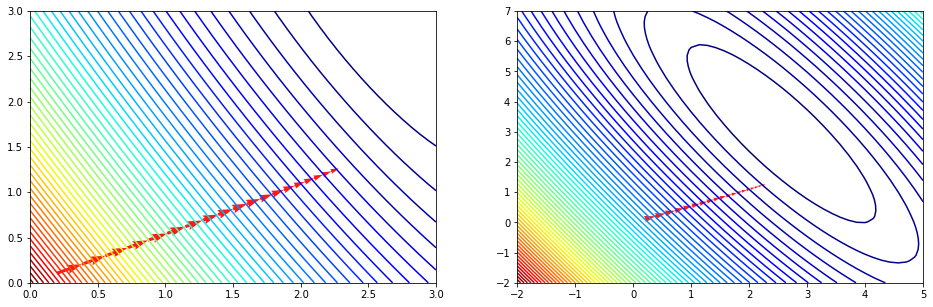

In [10]:
#Setup of meshgrid of theta values
T0, T1 = np.meshgrid(np.linspace(-2,5,50),np.linspace(-2,7,50))

#Computing the cost function for each theta combination
zs = np.array(  [costfunction(x_train, y.reshape(-1,1),np.array([t0,t1]).reshape(-1,1)) 
                     for t0, t1 in zip(np.ravel(T0), np.ravel(T1)) ] )
#Reshaping the cost values    
Z = zs.reshape(T0.shape)

#Setup of meshgrid of theta values
TY0, TY1 = np.meshgrid(np.linspace(0,3,50),np.linspace(0,3,50))
ty = np.array(  [costfunction(x_train, y.reshape(-1,1),np.array([t0,t1]).reshape(-1,1)) 
                     for t0, t1 in zip(np.ravel(TY0), np.ravel(TY1)) ] )
#Reshaping the cost values    
Y = ty.reshape(TY0.shape)
anglesx = np.array(theta_0)[1:] - np.array(theta_0)[:-1]
anglesy = np.array(theta_1)[1:] - np.array(theta_1)[:-1]

fig = plt.figure(figsize = (16,5))

ax = fig.add_subplot(1, 2, 2)
ax.contour(T0, T1, Z, 70, cmap = 'jet')
ax.quiver(theta_0[:-1], theta_1[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)

ay = fig.add_subplot(1, 2, 1)
ay.contour(TY0, TY1, Y, 70, cmap = 'jet')
ay.quiver(theta_0[:-1], theta_1[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)

plt.show()

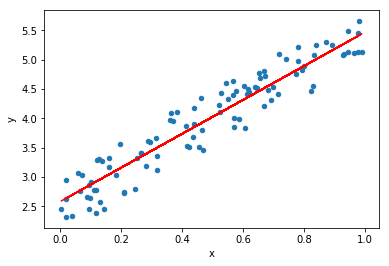

In [33]:
# Create a list of values in the best fit line
abline_values = [grad_thetas[1] * i + grad_thetas[0] for i in x]

# Plot the best fit line over the actual values
plt.scatter(x,y,s=20)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, abline_values, 'r')
plt.show()

# Using Coordinate Descent

Coordinate descent used to minimize a function by minimizing one direction at a time.Each time we select a coordinate then minimizes over the corresponding coordinate hyperplane while fixing all other coordinates. <br>

so having our cost function 
\begin{equation}
j(\theta)=\frac{1}{2} \sum_{i=1}^{n} \left( \sum_{j=1}^{d}x_{j}^{(i)} \theta_{j} - y^{(i)} \right)^2
\end{equation}
taking the derivative with respect to the parameter $θ_{j}$
\begin{equation}
\frac{\partial }{\partial \theta_j} j(\theta) =  \sum_{i=1}^n x_{j}^{(i)} \left(  \sum_{j=0}^d x_j^{(i)} \theta_j -y^{(i)} \right)
\end{equation}
we can represent update rule in matrix form
\begin{equation}
\theta_j=\theta_j-\mathbf{X}_{j}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{Y})
\end{equation}


In [16]:
def coordinate_descent(x, y,n_iterations,lr):
        n_samples,dim = x.shape
        thetas = np.zeros((dim, 1))
        theta_0_hist, theta_1_hist = [], []
        for _ in range(n_iterations):
            for j in range(dim):
                gradient=np.dot(x[:,j].T,(np.dot(x,thetas)-y))
                thetas[j] =thetas[j]- (lr / n_samples) * gradient
                theta_0_hist.append(thetas[0,0])
                theta_1_hist.append(thetas[1,0])
        return thetas,theta_0_hist, theta_1_hist
    
coordDesc_thetas,theta_0,theta_1=coordinate_descent(x_train,y,50,0.09) 
#print(coordDesc_thetas,theta_0,theta_1)

In [115]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x, y)
print(reg.coef_,reg.intercept_)

[[2.93655106]] [2.55808002]


# Visualizing Coordinate Descent

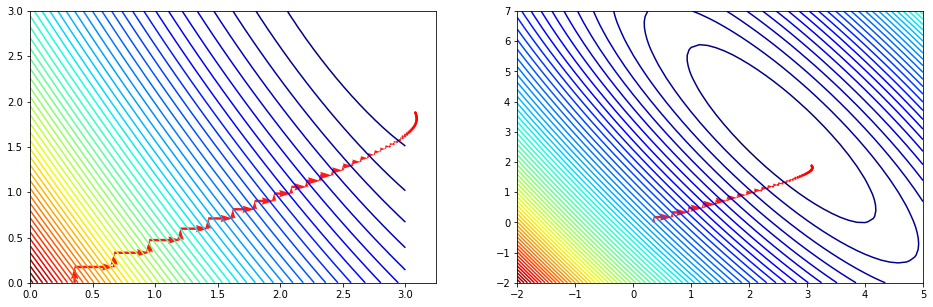

In [21]:
#Setup of meshgrid of theta values
T0, T1 = np.meshgrid(np.linspace(-2,5,50),np.linspace(-2,7,50))

#Computing the cost function for each theta combination
zs = np.array(  [costfunction(x_train, y.reshape(-1,1),np.array([t0,t1]).reshape(-1,1)) 
                     for t0, t1 in zip(np.ravel(T0), np.ravel(T1)) ] )
#Reshaping the cost values    
Z = zs.reshape(T0.shape)

#Setup of meshgrid of theta values
TY0, TY1 = np.meshgrid(np.linspace(0,3,50),np.linspace(0,3,50))
ty = np.array(  [costfunction(x_train, y.reshape(-1,1),np.array([t0,t1]).reshape(-1,1)) 
                     for t0, t1 in zip(np.ravel(TY0), np.ravel(TY1)) ] )
#Reshaping the cost values    
Y = ty.reshape(TY0.shape)
anglesx = np.array(theta_0)[1:] - np.array(theta_0)[:-1]
anglesy = np.array(theta_1)[1:] - np.array(theta_1)[:-1]

fig = plt.figure(figsize = (16,5))

ax = fig.add_subplot(1, 2, 2)
ax.contour(T0, T1, Z, 70, cmap = 'jet')
ax.quiver(theta_0[:-1], theta_1[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)

ay = fig.add_subplot(1, 2, 1)
ay.contour(TY0, TY1, Y, 70, cmap = 'jet')
ay.quiver(theta_0[:-1], theta_1[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)

plt.show()

# Lasso Regression (L1 regularization)

we now add the l1 norm  $|| \theta ||_1$ to our cost function weighted by $\lambda$ as a penalty to our cost function.<br>
the l1 norm is convex but not diffrentiable so we cant take ita derivative but we can use subgradients instead.<br>
now our cost function is defined as
\begin{equation}
j(\theta)=\frac{1}{2} \sum_{i=1}^{n} \left(y^{(i)}- \sum_{j=1}^{d}x_{j}^{(i)} \theta_{j}  \right)^2 +  \lambda \sum_{j=0}^n |\theta_j|
\end{equation}
$\textbf{focus on the OLS term}$ (in the general case when the data is not normalized)
\begin{equation}
j(\theta)=\frac{1}{2} \sum_{i=1}^{n} \left(y^{(i)}- \sum_{j=1}^{d}x_{j}^{(i)} \theta_{j}  \right)^2
\end{equation}
taking the derivative with respect to the parameter $θ_{j}$
\begin{aligned}
\frac{\partial }{\partial \theta_j} j(\theta) &= - \sum_{i=1}^n x_{j}^{(i)} \left( y^{(i)}- \sum_{j=0}^d x_j^{(i)} \theta_j  \right)
\\
&=- \sum_{i=1}^n x_j^{(i)}  \left(y^{(i)} - \sum_{k \neq j}^d \theta_k x_k^{(i)} - \theta_j x_j^{(i)}\right)
\\
& = -  \sum_{i=1}^n x_j^{(i)} \left(y^{(i)} - \sum_{k \neq j}^d \theta_k x_k^{(i)} \right) +  \theta_j \sum_{i=1}^n(x_j^{(i)})^2
\\
& = -  \sum_{i=1}^n x_j^{(i)}  \left(y^{(i)} - \hat y^{(i)}(x_{-j}) \right) +  \theta_j \sum_{i=1}^n(x_j^{(i)})^2
\end{aligned}
for notation simplicity we rewrite as 
\begin{equation}
= \rho_j + \theta_j z_j \ where \ z_j \ is \ normalizing \ constant
\end{equation}
in case where the data is normalized then
\begin{equation}
z_j =\sum_{i=1}^n(x_j^{(i)})^2=1
\end{equation}
Note: normalizing the data is defined as 
\begin{equation}
\tilde x_j^{(i)} = \frac{x_j^{(i)}}{\sqrt{\sum_{i=1}^n(x_j^{(i)})^2}}
\end{equation}
$\textbf{focus on regularization term}$
we can rewrite our L1 as
\begin{equation}
\lambda \sum_{j=0}^d |\theta_j| = \lambda |\theta_j| + \lambda \sum_{k\neq j}^d |\theta_k|
\end{equation}
we make use of coordinate descent to reduces the problem to a univariate one and optimize the equation as a function of $\theta_{j}$ treating the rest as constants.<br>
<br>
Notes on Subdifferential:
The Subdifferential is a non empty, closed interval [a,b] where a and b are the one sided limits:
\begin{equation}
a=\lim _{{x\to x_{0}^{-}}}{\frac  {f(x)-f(x_{0})}{x-x_{0}}} \\
b=\lim _{{x\to x_{0}^{+}}}{\frac  {f(x)-f(x_{0})}{x-x_{0}}}
\end{equation}
$\textbf{the derivative of L1 term wrt }$ $\theta_{j}$
\begin{equation}
   \frac{\partial } \partial_{\theta_j} \lambda \sum_{j=0}^n |\theta_j|  =      \partial_{\theta_j} \lambda |\theta_j|=
    \begin{cases}
       - \lambda  & \text{if}\ \theta_j < 0 \\
      [ - \lambda , \lambda ] & \text{if}\ \theta_j = 0 \\
        \lambda  & \text{if}\ \theta_j > 0 
    \end{cases}
  \end{equation}
combining the derivative of the OLS term and L1 term we get the subdiffrential of the lasso function
\begin{equation}
\frac{\partial } \partial_{\theta_j} j(\theta) = -\rho_j + \theta_j z_j + \partial_{\theta_j} \lambda || \theta_j || 
\end{equation}
we equate the diffrential to zero to find the minimun
\begin{aligned}
  0 & = -\rho_j + \theta_j z_j + \partial_{\theta_j} \lambda || \theta_j || 
    \\
    \\
    0 & =     \begin{cases}
       -\rho_j + \theta_j z_j  - \lambda & \text{if}\ \theta_j < 0 \\
        [-\rho_j  - \lambda ,-\rho_j + \lambda ] & \text{if}\ \theta_j = 0 \\
       -\rho_j + \theta_j z_j +  \lambda  & \text{if}\ \theta_j > 0 
    \end{cases}
\end{aligned}
solving for $\theta_{j}$ for the first case where $\theta_j < 0$
\begin{equation}
-\rho_j + \theta_j z_j  - \lambda  =0\\
\theta_j = \frac {\rho_j + \lambda} {z_j}\\
\text{since $\theta_{j} < 0$ then $\rho_j < - \lambda$ must hold }
\end{equation}

solving for $\theta_{j}$ for the third case where $\theta_j > 0$
\begin{equation}
-\rho_j + \theta_j z_j  + \lambda  =0\\
\theta_j = \frac {\rho_j - \lambda} {z_j}\\
\text{since $\theta_{j} > 0$ then $\rho_j > - \lambda$ must hold }
\end{equation}

solving for $\theta_{j}$ for the second case where $\theta_j = 0$

since $\theta_{j}=0$ is our global minimum then our interval must contain 0 (property of Subdifferentials) $0 \in [-\rho_j  - \lambda ,-\rho_j + \lambda ]$


\begin{equation}
-\rho_j  - \lambda \leq 0\\
-\rho_j  +\lambda \geq 0\\
- \lambda \leq \rho_j \leq \lambda\\
\end{equation}


Finaly we combine the 3 cases and we have the soft thresholding function which we use in updating $\theta_j$ .
\begin{aligned}
     \begin{cases}
       \theta_j = \frac{\rho_j + \lambda}{z_j}  & \text{for} \ \rho_j < - \lambda \\
       \theta_j = 0 & \text{for} \ - \lambda \leq \rho_j \leq \lambda \\
       \theta_j = \frac{\rho_j - \lambda}{z_j}  & \text{for} \ \rho_j > \lambda 
    \end{cases}
\end{aligned}

In [23]:
from sklearn.datasets import load_boston
import sklearn.linear_model as LM
import pandas as pd
# 13 features
data=load_boston()
X, y = load_boston(return_X_y=True)
pd.DataFrame(X).head()
y=y.reshape(-1,1)
lasso = Lasso(alpha = 0.1, normalize=True)
lasso.fit(X, y)
lasso_coef = lasso.coef_
print(lasso_coef)

[-0.          0.         -0.          0.         -0.          2.95469429
 -0.          0.         -0.         -0.         -0.24795828  0.
 -0.42817442]


# visualizing parameters paths given different values of lambda

(3.006656124117766e-06,
 23882.718514934175,
 -3.318910419876976,
 6.365300355214187)

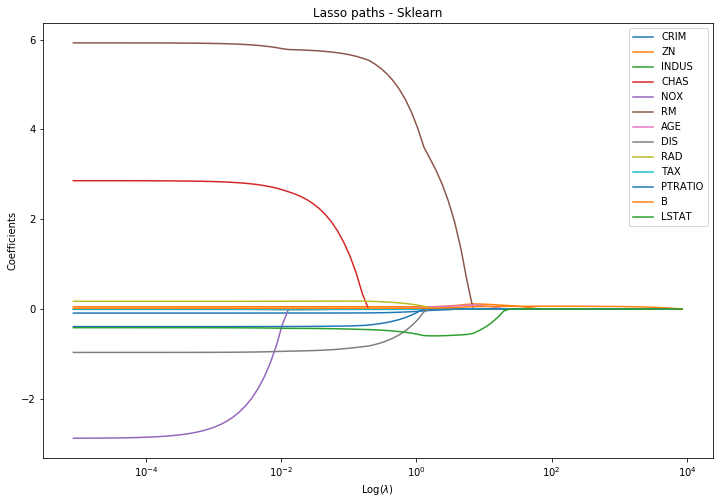

In [35]:
data=load_boston()
X, y = load_boston(return_X_y=True)
# Initialize variables
X / np.linalg.norm(X,axis=0)  # Standardize data (easier to set the l1_ratio parameter)
m,n = X.shape
eps = 10e-10

alphas_lasso, coefs_lasso, _ = LM.lasso_path(X, y, eps, fit_intercept=False)
plt.figure(figsize = (12,8))


for i in range(n):
    plt.plot(alphas_lasso, coefs_lasso[i], label = data.feature_names[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('Coefficients')
plt.title('Lasso paths - Sklearn')
plt.legend()
plt.axis('tight')

In [4]:
def soft_threshold(rho,lamda):
    if rho < - lamda:
        return (rho + lamda)/2
    elif rho >  lamda:
        return (rho - lamda)/2
    else: 
        return 0

In [7]:
def coordinate_descent_lasso(X,y,lamda = 0.1, num_iters=1000):    
    n,dim = X.shape
    #thetas = np.ones((dim, 1))
    thetas=np.random.randn(dim, 1)*10
    X = X / (np.linalg.norm(X,axis = 0)) 
    
    for i in range(num_iters): 
        for j in range(dim):
                x_j= X[:,j].reshape(-1,1)
                rho=x_j.T @ ( y- (X @ thetas) + thetas[j]*x_j )
                thetas[j] =  soft_threshold(rho, lamda)   
            
    return thetas.flatten()

thetas=coordinate_descent_lasso(X,y)
print(thetas)

[-22.1952541   52.41350909  18.22452357  27.75444674  54.2922752
  82.18017234  43.06533685  66.87699812   8.00144354  32.20517451
  58.43640298  77.52054233  -1.81561185]


# visualizing parameters paths given different values of lambda

(0.06309573444801936,
 1584.8931924611109,
 -27.414025425499332,
 87.3989436636732)

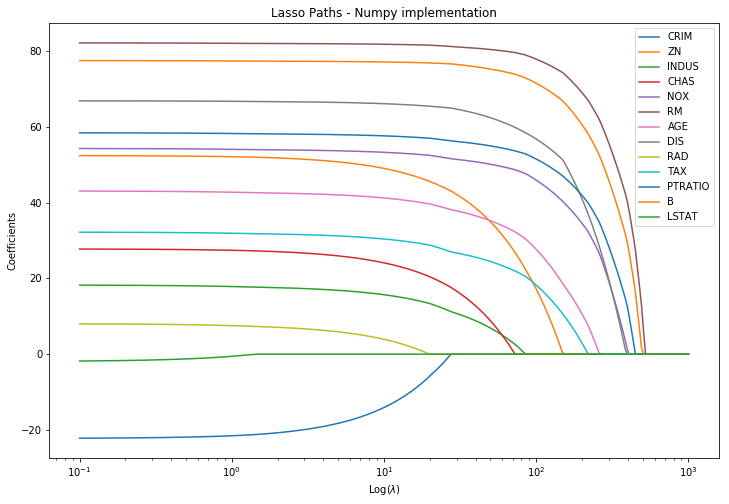

In [13]:
# Initialize variables
m,n = X.shape
initial_theta = np.ones((n,1))
theta_list = list()
lamda = np.logspace(0,4,300)/10 #Range of lambda values

#Run lasso regression for each lambda
for l in lamda:
    theta = coordinate_descent_lasso(X,y,lamda = l, num_iters=100)
    theta_list.append(theta)

#Stack into numpy array
theta_lasso = np.stack(theta_list).T

#Plot results
n,_ = theta_lasso.shape
plt.figure(figsize = (12,8))

for i in range(n):
    plt.plot(lamda, theta_lasso[i], label = data.feature_names[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('Coefficients')
plt.title('Lasso Paths - Numpy implementation')
plt.legend()
plt.axis('tight')


# Ridge Regression (L2 regularization)

we now add the l2 norm $\left\lVert \theta\right\rVert^2 _{2}$ weighted by hyperparameter $\lambda$ as a penalty to our loss function
\begin{equation} 
j\ (\theta)=(\textbf{Y}-\textbf{X} \boldsymbol{\theta)}^T (\textbf{Y}-\textbf{X} \boldsymbol{\theta)} + \lambda \left\lVert \boldsymbol{\theta}\right\rVert^2 _{2} 
\end{equation}

\begin{equation} 
\frac{\partial j(\theta)}{\partial \theta} = \frac{\partial}{\partial \theta}(Y^TY - 2Y^TX^T\theta + \theta^TX^TX\theta + \lambda \theta^T \theta)
\end{equation}

\begin{equation} 
=2X^TY+X^TX\theta + 2\lambda \theta=0
\end{equation}

\begin{equation} 
\theta=(X^TX + \lambda I)^{-1}X^TY
\end{equation}

# Closed form solution

In [49]:
lmd=0.1
theta=np.linalg.inv(x_train.transpose().dot(x_train) + lmd*np.identity(x_train.shape[1])).dot(x_train.transpose().dot(y))
print (theta)

[[2.56520329]
 [2.9160591 ]]
